# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^{th}$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

131072

In [4]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
  words = email.split()
  return words
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(list):
  stem_words = []
  ps = PorterStemmer()
  for i in range(len(list)):
    stem_words.append(ps.stem(list[i]))
  return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(list):
  stem_no_stop_words = []
  stop_words = set(stopwords.words('english'))
  for w in list:
    if w not in stop_words:
      stem_no_stop_words.append(w)
  return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(list):
  vocab = {}
  i=0
  for w in list:
    if w in vocab:
      continue
    else:
      vocab[w]=i
      i = i+1
  return vocab

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(list, vocab):
  email_bow = np.zeros(len(vocab), dtype=int)
  for key, value in vocab.items():
    if key in list:
      email_bow[value]=1
  return email_bow

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()

def read_data():
  data = []
  vocab = {}
  text = ""
  file = open("/content/spam_or_not_spam.csv")
  csvreader = csv.reader(file)
  next(csvreader)
  for x in csvreader:
    text = text + x[0] + " "
  stem = remove_stop_words(stemming(read_email(text)))
  vocab = build_vocabulary(stem)
  file.seek(0)
  csvreader = csv.reader(file)
  header = next(csvreader)
  for x in csvreader:
    text = x[0]
    label = x[1]
    stem = remove_stop_words(stemming(read_email(text)))
    bow = get_bow(stem, vocab)
    data.append([bow, label])
  file.close()
  return data
# email = "an apparent quote from dubya from the times sent to me by my dad URL tony blair s special relationship with george w bush is under considerable strain not only do the two disagree on yassir arafat s tenure as leader of the palestinian authority but blair has started telling disparaging anecdotes about the president baroness williams of crosby recalled a story told to her by my good friend tony blair recently in brighton blair bush and jacques chirac were discussing economics and in particular the decline of the french economy the problem with the french bush confided in blair is that they don t have a word for entrepreneur r URL "
# v = remove_stop_words(stemming(read_email(email)))
# w = build_vocabulary(v)
# print(get_bow(v,w))
DATA = read_data()

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


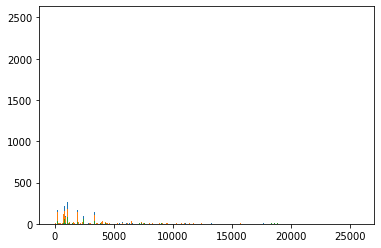

In [19]:
Y = np.array(DATA)
import matplotlib.pyplot as plt

# visuallze data distribution
def data_vis(data):
  A = data[:,0]
  X = A.sum(axis=0)
  plt.bar(x = range(len(X)), height = X)
  B = []
  C = []
  for x in data:
    if x[1]=='0':
      B.append(x)
    else:
      C.append(x)
  B = np.array(B)
  B = B[:,0]
  Y = B.sum(axis=0)
  C = np.array(C)
  C = C[:,0]
  Z = C.sum(axis=0)

  plt.bar(x = range(len(Y)), height = Y)
  plt.bar(x = range(len(Y)), height = Z)
  plt.show()

data_vis(Y)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import random

# split dataset
def slices(train_data,test_data):
  train_email = []
  train_label = []
  for cases in train_data:
    train_email.append(cases[0])
    train_label.append(cases[1])
  test_email = []
  test_label = []
  for cases in test_data:
    test_email.append(cases[0])
    test_label.append(cases[1])
  return train_email, train_label, test_email, test_label

def split(data):
  train_data = data[:int(0.8*len(data))]
  test_data = data[int(0.8*len(data)):]
  return train_data, test_data

def svm_classifier(train_data, test_data):
  clf = svm.SVC()
  train_email, train_label, test_email, test_label = slices(train_data,test_data)
  clf.fit(train_email, train_label)
  train_predict = clf.predict(train_email)
  test_predict = clf.predict(test_email)
  return train_predict, test_predict

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data, test_data):
  neigh = KNeighborsClassifier(n_neighbors=2)
  train_email, train_label, test_email, test_label = slices(train_data,test_data)
  neigh.fit(train_email, train_label)
  train_labels = neigh.predict(train_email)
  test_labels = neigh.predict(test_email)
  return train_labels, test_labels

X = random.sample(DATA, len(DATA))
Y = np.array(X)
train_data, test_data = split(Y)
# print((test_data[0]).shape)
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [12]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
  acc = metrics.accuracy_score(true_labels, predicted_labels)
  return acc
# compute AUC score 
def compute_auc(true_labels, predicted_labels):
  auc = metrics.roc_auc_score(true_labels, predicted_labels)
  return auc

# write code to print train and test accuracy and AUC score of SVM and k-NN classifier
print("SVM TRAIN ACCURACY=",compute_accuracy(svm_train_predictions, train_data[:,1]))
print("SVM TRAIN AUC SCORE=",compute_auc(svm_train_predictions, train_data[:,1]))
print("SVM TEST ACCURACY=",compute_accuracy(svm_test_predictions, test_data[:,1]))
print("SVM TEST AUC SCORE=",compute_auc(svm_test_predictions, test_data[:,1]))
print("KNN TRAIN ACCURACY=",compute_accuracy(knn_train_predictions, train_data[:,1]))
print("KNN TRAIN AUC SCORE=",compute_auc(knn_train_predictions, train_data[:,1]))
print("KNN TEST ACCURACY=",compute_accuracy(knn_test_predictions, test_data[:,1]))
print("KNN TEST AUC SCORE=",compute_auc(knn_test_predictions, test_data[:,1]))


SVM TRAIN ACCURACY= 0.9945833333333334
SVM TRAIN AUC SCORE= 0.9967613353263577
SVM TEST ACCURACY= 0.975
SVM TEST AUC SCORE= 0.9856046065259116
KNN TRAIN ACCURACY= 0.9883333333333333
KNN TRAIN AUC SCORE= 0.9930761622156281
KNN TEST ACCURACY= 0.9016666666666666
KNN TEST AUC SCORE= 0.8056125882089064
